# Pymaceuticals Inc.
---

### Analysis

 - In our first bar graph it is easy to see that Ramicane(227) and Capomulin(227) had the most amount of timeouts for our trials while proprivia had the least amount of timeouts(161). We can concluse that Capomulin rendered the best results when it came to timeouts.
 - Capomulin and Ramicane had the lowest variance which could lets us say that they were the most successful duirng out trial. 
 - We had a correlation a high correlation of 0.84 between Mouse weight and how large the tumor volume was. Meaning that mouses with a higher weight need a a higher dose.
 - Our R-Square value was 0.72 so 72%. Meaning that our independent value, mouse weight, varried 70% from our dependent value, average tumor volume.  

In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import scipy.stats as st
import numpy as np
%matplotlib inline

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_complete = pd.merge(mouse_metadata,study_results, how ="outer", on = "Mouse ID")

# Display the data table for preview
mouse_study_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
#mouse_count = mouse_study_complete['Mouse ID'].drop_duplicates(), used this to check if there were any duplicates
mouse_count = len(mouse_study_complete["Mouse ID"].unique())
mouse_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
find_dups = mouse_study_complete.loc[mouse_study_complete.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
find_dups

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_data = mouse_study_complete.loc[mouse_study_complete["Mouse ID"] == "g989", 
                                     ["Mouse ID", "Timepoint", 
                                      "Tumor Volume (mm3)",
                                      "Metastatic Sites", 
                                      "Drug Regimen",
                                      "Sex", 
                                      "Age_months", 
                                      "Weight (g)"]]
g989_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
914,g989,15,51.325852,1,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
916,g989,20,55.326122,1,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study = mouse_study_complete.drop([107,137,329,360,620,681,815,869,950,1111,1195,1380,1592],axis='index')
#Checking to see that the row was actually deleted 
g989_data_deleted = clean_mouse_study.loc[clean_mouse_study["Mouse ID"] == "g989", 
                                     ["Mouse ID", "Timepoint", 
                                      "Tumor Volume (mm3)",
                                      "Metastatic Sites", 
                                      "Drug Regimen",
                                      "Sex", 
                                      "Age_months", 
                                      "Weight (g)"]]
clean_mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = len(clean_mouse_study["Mouse ID"].unique())
clean_mouse_count

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


#Set index to drug regimen
drug_type = clean_mouse_study['Drug Regimen'].unique()

#mean for tumor volume 
mean_tumor_volume = clean_mouse_study.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()

#median for tumor volume 
median_tumor_volume = clean_mouse_study.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()

#tumor volume varience
variance_tumor_volume = clean_mouse_study.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()

#tumor volume standard deviation 
std_dev_tumor_volume = clean_mouse_study.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()

#tumor volume standard deviation error 
std_dev_err_tumor_volume = clean_mouse_study.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

#Creating DataFrame

clean_mouse_study_df = pd.DataFrame({'Mean Tumor Volume': mean_tumor_volume,
                                     'Median Tumor Volume': median_tumor_volume,
                                     'Tumor Voulume Varience': variance_tumor_volume,
                                     'Tumor Volume Std. Dev.': std_dev_tumor_volume,
                                     'Tumor Volume Std. Err.': std_dev_err_tumor_volume
                                    })

                                     

In [8]:
mean_tumor_volume

Drug Regimen
Capomulin    40.629990
Ceftamin     52.527592
Infubinol    52.884795
Ketapril     55.243392
Naftisol     54.331565
Placebo      54.083767
Propriva     52.322552
Ramicane     40.216047
Stelasyn     54.358770
Zoniferol    53.283525
Name: Tumor Volume (mm3), dtype: float64

In [9]:
median_tumor_volume

Drug Regimen
Capomulin    41.534097
Ceftamin     51.683256
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.316010
Propriva     50.854632
Ramicane     40.678129
Stelasyn     52.572487
Zoniferol    51.909027
Name: Tumor Volume (mm3), dtype: float64

In [10]:
variance_tumor_volume

Drug Regimen
Capomulin    25.011961
Ceftamin     38.789775
Infubinol    43.128684
Ketapril     68.906024
Naftisol     66.173479
Placebo      61.051374
Propriva     42.351070
Ramicane     23.590516
Stelasyn     59.393363
Zoniferol    48.806687
Name: Tumor Volume (mm3), dtype: float64

In [11]:
std_dev_tumor_volume

Drug Regimen
Capomulin    5.001196
Ceftamin     6.228144
Infubinol    6.567243
Ketapril     8.300965
Naftisol     8.134708
Placebo      7.813538
Propriva     6.507770
Ramicane     4.857007
Stelasyn     7.706709
Zoniferol    6.986178
Name: Tumor Volume (mm3), dtype: float64

In [12]:
std_dev_err_tumor_volume

Drug Regimen
Capomulin    0.331941
Ceftamin     0.468136
Infubinol    0.492236
Ketapril     0.608656
Naftisol     0.596466
Placebo      0.582387
Propriva     0.512884
Ramicane     0.322371
Stelasyn     0.577642
Zoniferol    0.520719
Name: Tumor Volume (mm3), dtype: float64

In [13]:
clean_mouse_study_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Voulume Varience,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.629990,41.534097,25.011961,5.001196,0.331941
Ceftamin,52.527592,51.683256,38.789775,6.228144,0.468136
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.243392,53.698743,68.906024,8.300965,0.608656
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.083767,52.316010,61.051374,7.813538,0.582387
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216047,40.678129,23.590516,4.857007,0.322371
Stelasyn,54.358770,52.572487,59.393363,7.706709,0.577642


In [14]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
#Figured this out by using https://sparkbyexamples.com/pandas/pandas-groupby-aggregate-explained/#:~:text=In%20Pandas%2C%20the%20aggregate(),apply%20aggregation%20functions%20to%20it.
aggregation= clean_mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)']
Low_agg = aggregation.agg(['mean','median','var','std','sem'])
Low_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.629990,41.534097,25.011961,5.001196,0.331941
Ceftamin,52.527592,51.683256,38.789775,6.228144,0.468136
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.243392,53.698743,68.906024,8.300965,0.608656
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.083767,52.316010,61.051374,7.813538,0.582387
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216047,40.678129,23.590516,4.857007,0.322371
Stelasyn,54.358770,52.572487,59.393363,7.706709,0.577642


In [15]:
mouse_study_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [16]:
mouse_timepoint_df = clean_mouse_study[["Mouse ID","Timepoint"]]
mouse_timepoint_df

,Mouse ID,Timepoint
0,k403,0
1,k403,5
2,k403,10
3,k403,15
4,k403,20
...,...,...
1888,z969,25
1889,z969,30
1890,z969,35
1891,z969,40


## Bar and Pie Charts

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count = clean_mouse_study['Drug Regimen'].value_counts()
mice_count

Ramicane     227
Capomulin    227
Ketapril     186
Naftisol     186
Placebo      180
Zoniferol    180
Infubinol    178
Stelasyn     178
Ceftamin     177
Propriva     161
Name: Drug Regimen, dtype: int64

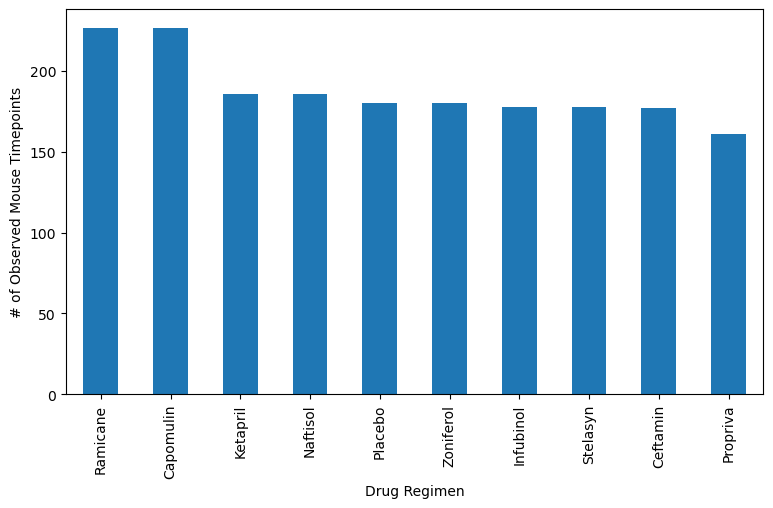

In [18]:
mice_count_bar = mice_count.plot.bar(figsize=(9,5),linewidth=1)
mice_count_bar.set_xlabel('Drug Regimen')
mice_count_bar .set_ylabel('# of Observed Mouse Timepoints')

plt.show()


In [19]:
mice_count = clean_mouse_study['Drug Regimen'].value_counts()
drug_count = clean_mouse_study['Drug Regimen'].unique()
drug_count

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

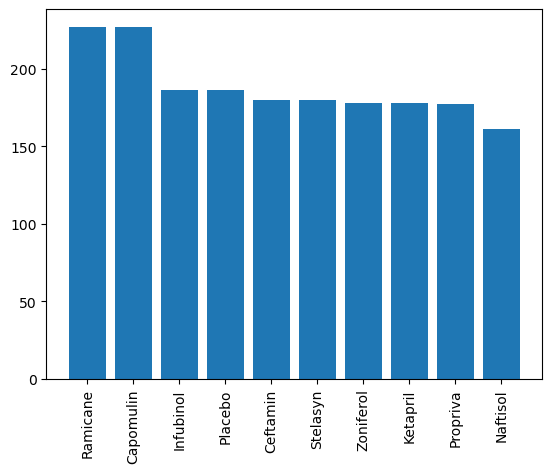

In [20]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = drug_count
y_axis = mice_count

#creating bar chart 
plt.bar(x_axis,y_axis,align ='center')
    
#setting labels for chart
plt.xlabel=('Drug Regimen')
plt.ylabel=('# of Observed Mouse Timeouts' )
plt.xticks(rotation="vertical")

plt.show()

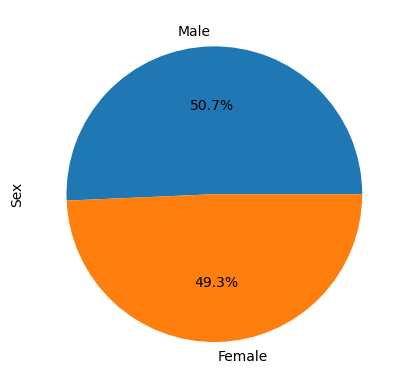

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count = clean_mouse_study['Sex'].value_counts()
sex_count.plot.pie(autopct= "%1.1f%%")
plt.show()

In [22]:
sex_count = clean_mouse_study['Sex'].value_counts()
sex_count

Male      953
Female    927
Name: Sex, dtype: int64

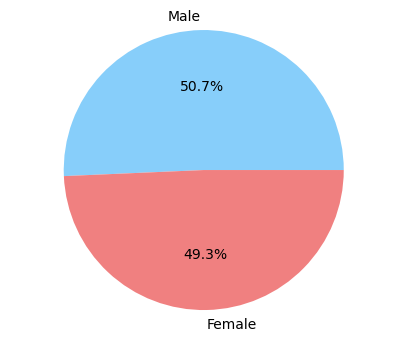

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_count = clean_mouse_study['Sex'].value_counts()
colors = ['lightskyblue','lightcoral']
labels = ['Male','Female']

fig = plt.figure(figsize=(5,4))

plt.pie(sex_count, labels=labels, colors=colors, autopct="%1.1f%%")

plt.axis("equal")

plt.ylabel=('Sex')

plt.show()

## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Start by getting the last (greatest) timepoint for each mouse

#for Capomulin
capomulin_df = clean_mouse_study.loc[clean_mouse_study['Drug Regimen'] == ('Capomulin')]
ramicane_df = clean_mouse_study.loc[clean_mouse_study['Drug Regimen'] ==('Ramicane')]
infubinol_df = clean_mouse_study.loc[clean_mouse_study['Drug Regimen'] ==('Infubinol')]
ceftamin_df = clean_mouse_study.loc[clean_mouse_study['Drug Regimen'] ==('Ceftamin')]


capomulin_max = capomulin_df.groupby('Mouse ID')['Timepoint'].max()
capomulin_vol = pd.DataFrame(capomulin_max)
capomulin_merge = pd.merge(capomulin_vol, clean_mouse_study, on = ('Mouse ID', 'Timepoint'), how = 'left')

capomulin_merge.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,40,Capomulin,Female,22,22,45.565821,2


In [25]:
capomulin_tumors = capomulin_merge['Tumor Volume (mm3)']

quartiles = capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[.75]
iqr = upperq - lowerq

print(f"The lower quartile of Capomulin Tumors is: {lowerq}")
print(f"The upper quartile of Capomulin Tumors is: {upperq}")
print(f"The interquartile range of Capomulin Tumors is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin Tumors is: 32.37735684
The upper quartile of Capomulin Tumors is: 40.65812366
The interquartile range of Capomulin Tumors is: 8.280766820000004
The the median of temperatures is: 38.1251644 
Values below 19.95620660999999 could be outliers.
Values above 53.07927389000001 could be outliers.


In [26]:
# for Ramicane

ramicane_max = ramicane_df.groupby('Mouse ID')['Timepoint'].max()
ramicane_vol = pd.DataFrame(ramicane_max)
ramicane_merge = pd.merge(ramicane_vol, clean_mouse_study, on = ('Mouse ID', 'Timepoint'), how = 'left')

ramicane_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [27]:
ramicane_tumors = ramicane_merge['Tumor Volume (mm3)']

quartiles = ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[.75]
iqr = upperq - lowerq

print(f"The lower quartile of ramincane Tumors is: {lowerq}")
print(f"The upper quartile of ramincane Tumors is: {upperq}")
print(f"The interquartile range of ramincane Tumors is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of ramincane Tumors is: 31.56046955
The upper quartile of ramincane Tumors is: 40.65900627
The interquartile range of ramincane Tumors is: 9.098536719999998
The the median of temperatures is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [28]:
#for infubinol

infubinol_max = infubinol_df.groupby('Mouse ID')['Timepoint'].max()
infubinol_vol = pd.DataFrame(infubinol_max)
infubinol_merge = pd.merge(infubinol_vol, clean_mouse_study, on=('Mouse ID', 'Timepoint'), how='left')

infubinol_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [29]:
infubinol_tumors = infubinol_merge['Tumor Volume (mm3)']

quartiles = infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[.75]
iqr = upperq - lowerq

print(f"The lower quartile of Infbinol Tumors is: {lowerq}")
print(f"The upper quartile of Infbinol Tumors is: {upperq}")
print(f"The interquartile range of Infbinol Tumors is: {iqr}")
print(f"The the median of Infbinol Tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infbinol Tumors is: 54.04860769
The upper quartile of Infbinol Tumors is: 65.52574285
The interquartile range of Infbinol Tumors is: 11.477135160000003
The the median of Infbinol Tumors is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [30]:
#for ceftamin

ceftamin_max = ceftamin_df.groupby('Mouse ID')['Timepoint'].max()
ceftamin_vol = pd.DataFrame(ceftamin_max)
ceftamin_merge = pd.merge(ceftamin_vol, clean_mouse_study, on=('Mouse ID', 'Timepoint'), how='left')

ceftamin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [31]:
ceftamin_tumors = ceftamin_merge['Tumor Volume (mm3)']

quartiles = ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[.75]
iqr = upperq - lowerq

print(f"The lower quartile of Ceftamin Tumors is: {lowerq}")
print(f"The upper quartile of Ceftamin Tumors is: {upperq}")
print(f"The interquartile range of Ceftamin Tumors is: {iqr}")
print(f"The the median of Infbinol Tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ceftamin Tumors is: 48.72207785
The upper quartile of Ceftamin Tumors is: 64.29983003
The interquartile range of Ceftamin Tumors is: 15.577752179999997
The the median of Infbinol Tumors is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [32]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.     
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    
drugs_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs_df = clean_mouse_study[clean_mouse_study["Drug Regimen"].isin(drugs_list)]

last_timepoint = drugs_df.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
last_timepoint = last_timepoint.stack(level=0).unstack(level=0)
for drug in drugs_list:
    print(drug)

Capomulin
Ramicane
Infubinol
Ceftamin


In [33]:
treatment = 0 

for drug in drugs_list:
    quartiles = last_timepoint[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[.75].round(2)
    idr = round(upperq - lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    if treatment == 0:
        print(f"------------------------------------------------------------")
    print(f"The lower quartile of {drug} treatments is: {lowerq}")
    print(f"The upper quartile of {drug} treatments is: {upperq}")
    print(f"The interquartile range of {drug} treatments is: {iqr}")
    print(f"Values below {lower_bound} could be {drug} outliers.")
    print(f"Values above {upper_bound} could be {drug} outliers.")
    print(f"------------------------------------------------------------")
    treatment+=1
        

------------------------------------------------------------
The lower quartile of Capomulin treatments is: 32.38
The upper quartile of Capomulin treatments is: 40.66
The interquartile range of Capomulin treatments is: 15.577752179999997
Values below 9.01 could be Capomulin outliers.
Values above 64.03 could be Capomulin outliers.
------------------------------------------------------------
The lower quartile of Ramicane treatments is: 31.56
The upper quartile of Ramicane treatments is: 40.66
The interquartile range of Ramicane treatments is: 15.577752179999997
Values below 8.19 could be Ramicane outliers.
Values above 64.03 could be Ramicane outliers.
------------------------------------------------------------
The lower quartile of Infubinol treatments is: 54.05
The upper quartile of Infubinol treatments is: 65.53
The interquartile range of Infubinol treatments is: 15.577752179999997
Values below 30.68 could be Infubinol outliers.
Values above 88.9 could be Infubinol outliers.
------

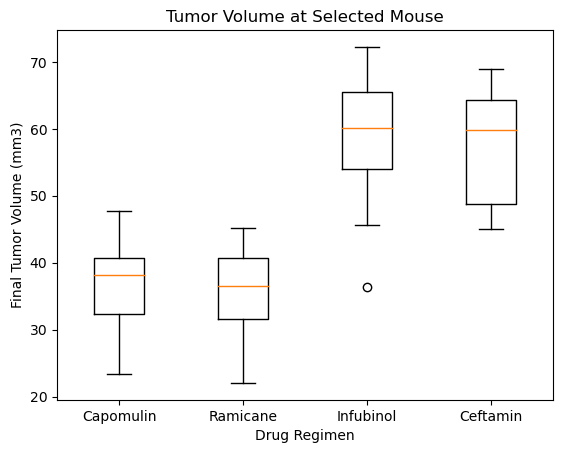

In [34]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

box_plot = [capomulin_tumors, ramicane_tumors, infubinol_tumors, ceftamin_tumors]
drug_regimen = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots()

ax1.set_title('Tumor Volume at Selected Mouse')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(box_plot, labels=drug_regimen, widths = 0.4, vert=True)
plt.show()

## Line and Scatter Plots

TypeError: 'str' object is not callable

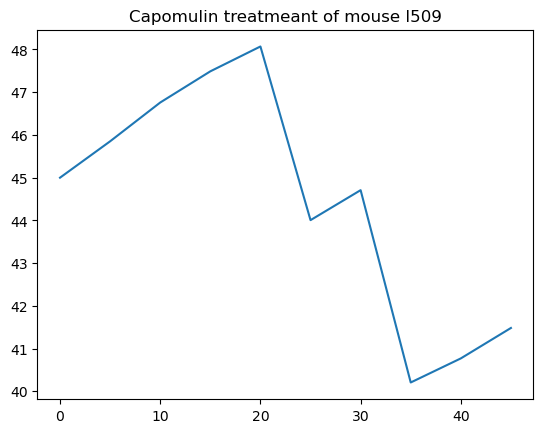

In [35]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#g989_data_deleted = clean_mouse_study.loc[clean_mouse_study["Mouse ID"] == "g989", 

line_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509",:]
xaxis = line_df["Timepoint"]
yaxis = line_df["Tumor Volume (mm3)"]


plt.plot(xaxis,yaxis)


plt.title('Capomulin treatmeant of mouse l509')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

/var/folders/w9/1qf67rw90dgbqv7rkw546lvh0000gn/T/ipykernel_37067/1506549213.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  scatter_df = capomulin_df.groupby(["Mouse ID"]).mean()


Text(0.5, 1.0, 'Mouse Weight Versus Average Tumor Volume')

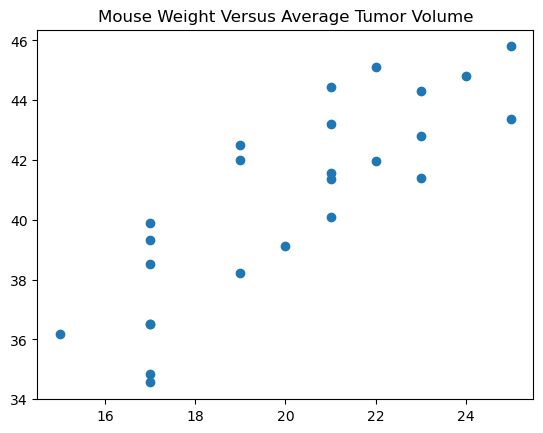

In [42]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

scatter_df = capomulin_df.groupby(["Mouse ID"]).mean()

xaxis = scatter_df["Weight (g)"]
yaxis = scatter_df["Tumor Volume (mm3)"]

plt.scatter(xaxis,yaxis)
plt.title('Mouse Weight Versus Average Tumor Volume')


## Correlation and Regression

The correlation between both factors is 0.84
The r-squared is: 0.702


/var/folders/w9/1qf67rw90dgbqv7rkw546lvh0000gn/T/ipykernel_37067/2796217050.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  scatter_df = capomulin_df.groupby(["Mouse ID"]).mean()


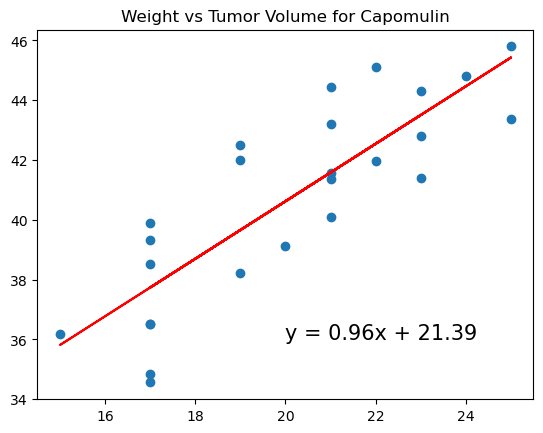

In [43]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

#correlation
correlation = st.pearsonr(scatter_df["Weight (g)"],scatter_df["Tumor Volume (mm3)"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

scatter_df = capomulin_df.groupby(["Mouse ID"]).mean()
xaxis = scatter_df["Weight (g)"]
yaxis = scatter_df["Tumor Volume (mm3)"]

#line regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis,yaxis)

regress_values = xaxis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) 
plt.scatter(xaxis,yaxis)
plt.plot(xaxis,regress_values,"r-")
plt.annotate(line_eq,(20,36), fontsize=15, color="black")
#plt.xlabel("Weight(g)")
#plt.ylabel("Average Tumor Volume(mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()
